In [1]:
import torch as tt
import matplotlib.pyplot as plt

##### Lecture Slides can be found [here](https://cciitpatna-my.sharepoint.com/personal/shivani_2221cs12_iitp_ac_in/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fshivani%5F2221cs12%5Fiitp%5Fac%5Fin%2FDocuments%2FEdge%20Computing&ga=1) 

# Solutions for Section B (Mid-Sem Edge Computing)

# Q6

## 6.[a]

Refering to the third point in Section 3.2.3 in the paper *Attention is all you need*


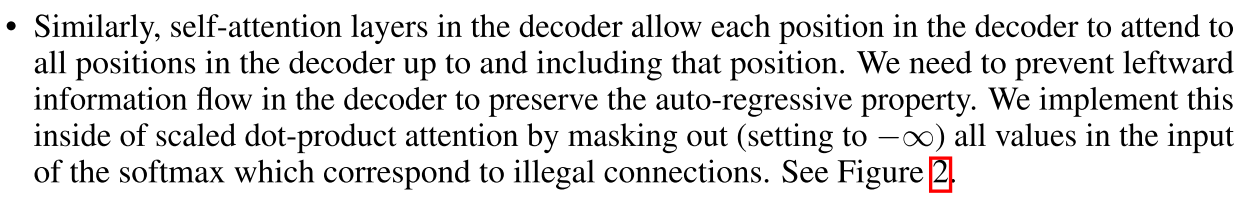

The authors propose preventing leftward flow of information by using masked self-attention, thus preserving the auto-regressive property of the decoder. The mask can be implemented as in the following example.

Note that softmax will always output positive non-zero weights for each key. However, if we replace the dot product with negative infinity then softmax will output zero weight since $e^{-\infty} = 0$

In [2]:
print(tt.e**(-tt.inf))

0.0


### Example of Unmasked v/s Masked attention

In [3]:
# let there be a sequence S of 6 vectors, each of dimension=4 
S = tt.arange(1, 25).reshape((6,4)).to(dtype=tt.float)/10
print(f'S = {S.shape}\n{S}')

# In self attention, 
# queries, keys and values are taken from the same sequence
# these are the tokens in the input sequence 
# obtained after embedding, positional encoding and projection 
# NOTE: added random to mimic the projection
Q = S.clone()+tt.rand(S.shape)
K = S.clone()+tt.rand(S.shape)
V = S.clone()+tt.rand(S.shape)
print(f"""
Q: {Q.shape}\n{Q}
K: {K.shape}\n{K}
V: {V.shape}\n{V}
""")

S = torch.Size([6, 4])
tensor([[0.1000, 0.2000, 0.3000, 0.4000],
        [0.5000, 0.6000, 0.7000, 0.8000],
        [0.9000, 1.0000, 1.1000, 1.2000],
        [1.3000, 1.4000, 1.5000, 1.6000],
        [1.7000, 1.8000, 1.9000, 2.0000],
        [2.1000, 2.2000, 2.3000, 2.4000]])

Q: torch.Size([6, 4])
tensor([[0.9818, 0.2225, 0.7160, 1.3124],
        [1.4825, 1.4978, 1.1801, 1.3984],
        [0.9897, 1.0408, 1.6262, 2.1507],
        [2.2847, 2.3788, 2.0114, 1.9740],
        [2.6696, 1.8106, 2.0157, 2.1097],
        [2.3644, 2.2733, 2.7206, 3.3976]])
K: torch.Size([6, 4])
tensor([[0.3485, 0.9137, 0.5340, 1.0526],
        [0.5701, 0.8532, 1.6786, 0.8313],
        [1.8626, 1.3014, 1.1505, 1.5896],
        [2.2094, 1.7191, 2.0075, 2.3551],
        [1.7009, 2.2220, 2.1686, 2.3638],
        [2.6978, 2.5102, 3.0589, 2.5336]])
V: torch.Size([6, 4])
tensor([[0.9511, 1.0522, 1.0524, 1.1492],
        [1.4185, 0.9779, 0.7044, 1.2663],
        [1.7175, 1.2908, 1.5972, 1.3510],
        [1.5558, 2.1454, 

### Unmasked Attention


UnMasked Dot-Product: torch.Size([6, 6]) : 
tensor([[ 1.1546,  1.5212,  2.5141,  3.5399,  3.4097,  4.3612],
        [ 1.9937,  2.6333,  4.1456,  5.7563,  5.8573,  7.4560],
        [ 2.2140,  2.9850,  4.2438,  6.1528,  6.3033,  7.8530],
        [ 3.0608,  4.1748,  6.4017,  8.9120,  9.1000, 11.6445],
        [ 2.9408,  4.1020,  6.5007,  9.0128,  8.9610, 11.6289],
        [ 3.9651,  5.3394,  7.9467, 11.2976, 11.5021, 14.5076]])

Attention Weights: torch.Size([6, 6])
tensor([[1.9444e-02, 2.8054e-02, 7.5720e-02, 2.1121e-01, 1.8542e-01, 4.8016e-01],
        [2.9600e-03, 5.6113e-03, 2.5460e-02, 1.2746e-01, 1.4100e-01, 6.9750e-01],
        [2.4815e-03, 5.3644e-03, 1.8890e-02, 1.2743e-01, 1.4813e-01, 6.9770e-01],
        [1.6278e-04, 4.9591e-04, 4.5977e-03, 5.6592e-02, 6.8295e-02, 8.6986e-01],
        [1.4672e-04, 4.6857e-04, 5.1581e-03, 6.3606e-02, 6.0396e-02, 8.7022e-01],
        [2.4179e-05, 9.5567e-05, 1.2961e-03, 3.6975e-02, 4.5367e-02, 9.1624e-01]])

Attention Output: torch.Size([6, 4])


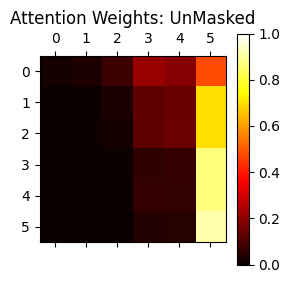

In [4]:

# the usual scaled dot product attention (with no masking)
def scaled_dot_prod_attention(Q,K,V):
    dk = K.shape[-1]
    dotprod = (tt.matmul(Q,K.T)/(dk**0.5))
    weights = tt.softmax(dotprod, dim=-1)
    attention = tt.matmul( weights , V )
    return weights, attention, dotprod

W, A, unmasked_dot_product = scaled_dot_prod_attention(Q,K,V)
print(f"""
UnMasked Dot-Product: {unmasked_dot_product.shape} : 
{unmasked_dot_product}

Attention Weights: {W.shape}
{W}

Attention Output: {A.shape}
{A}
""")
# visulaize weights
fig = plt.figure(figsize=(3,3))
plt.matshow(W, cmap='hot', vmin=0.0, vmax=1.0, fignum=0)
plt.colorbar()
plt.title('Attention Weights: UnMasked')
plt.show()

### Masked Attention

#### [causal masking]
* we require the input sequence to follow "causality" 
* this means that tokens can attend to only those tokens which are prior to itself and not ahead in the sequence
* therefore we want to mask future tokens in the sequence
* this will prevent "leftward" flow of information thus preserving the auto-regressive property


Mask (boolean): torch.Size([6, 6]) : True means attention is 'masked' i.e. set to -infinity
tensor([[False,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False, False,  True,  True],
        [False, False, False, False, False,  True],
        [False, False, False, False, False, False]])

Masked Dot-Product: torch.Size([6, 6]) : 
tensor([[ 1.1546,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 1.9937,  2.6333,    -inf,    -inf,    -inf,    -inf],
        [ 2.2140,  2.9850,  4.2438,    -inf,    -inf,    -inf],
        [ 3.0608,  4.1748,  6.4017,  8.9120,    -inf,    -inf],
        [ 2.9408,  4.1020,  6.5007,  9.0128,  8.9610,    -inf],
        [ 3.9651,  5.3394,  7.9467, 11.2976, 11.5021, 14.5076]])

Attention Weights: torch.Size([6, 6])
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.4534e-01, 6.5466e-01, 0.0000e+00, 

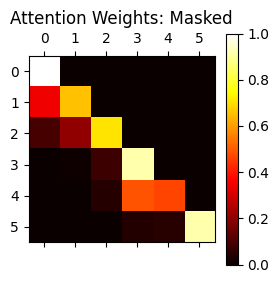

In [5]:
# causally masked attention
def causal_mask_scaled_dot_prod_attention(Q,K,V):
    dk = K.shape[-1]
    dotprod = (tt.matmul(Q,K.T)/(dk**0.5))

    mask = tt.triu(tt.ones_like(dotprod), diagonal=1).to(dtype=tt.bool)
    dotprod = tt.masked_fill(dotprod, mask, -tt.inf)

    weights = tt.softmax(dotprod, dim=-1)
    attention = tt.matmul( weights , V )
    return weights, attention, mask, dotprod


W, A, mask, masked_dot_product = causal_mask_scaled_dot_prod_attention(Q,K,V)
print(f"""
Mask (boolean): {mask.shape} : True means attention is 'masked' i.e. set to -infinity
{mask}

Masked Dot-Product: {masked_dot_product.shape} : 
{masked_dot_product}

Attention Weights: {W.shape}
{W}

Attention Output: {A.shape}
{A}
""")
# visulaize weights
fig = plt.figure(figsize=(3,3))
plt.matshow(W, cmap='hot', vmin=0.0, vmax=1.0, fignum=0)
plt.colorbar()
plt.title('Attention Weights: Masked')
plt.show()

Therefore, masking allows us to set attention scores between certain keys and queries to zero.

In this example we saw causal masking that is used to maintain auto-regressive property of decoder, however any masking pattern can be used.

NOTE: *bi-directional attention* (like in BERT) often refers to attention with no masking i.e., the information flows in both leftward and rightward directions


## 6.[b]

In [6]:
def generate_keys():
    K = tt.zeros((4,4), dtype=tt.float)
    for i in range(1,5):
        for j in range(1,5):
            K[i-1,j-1] = 0 if i!=j else 1
    return K

def generate_values():
    V = tt.zeros((4,2), dtype=tt.float)
    for i in range(1,5):
        for j in range(1,3):
            V[i-1,j-1] = (((-1)**i) * (j%2)) if i<=2 else (((-1)**i) * (j-1))
    return V

def generate_queries():
    Q = tt.zeros((1,4), dtype=tt.float)
    for j in range(1,5): Q[0, j-1] = 2*j
    return Q

Q, K, V = generate_queries(), generate_keys(), generate_values()
print(f"""
Q={Q.shape}\n{Q}

K={K.shape}\n{K}

V={V.shape}\n{V}
""")

# the scaled dot product attention 
def scaled_dot_prod_attention(Q,K,V):
    dk = K.shape[-1]
    dotprod = (tt.matmul(Q,K.T)/(dk**0.5))
    weights = tt.softmax(dotprod, dim=-1)
    attention = tt.matmul( weights , V )
    return weights, attention

W, A = scaled_dot_prod_attention(Q,K,V)
print(f"""
Attention Weights: {W.shape}
{W}

Attention Output: {A.shape}
{A}
""")



Q=torch.Size([1, 4])
tensor([[2., 4., 6., 8.]])

K=torch.Size([4, 4])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

V=torch.Size([4, 2])
tensor([[-1.,  0.],
        [ 1.,  0.],
        [ 0., -1.],
        [ 0.,  1.]])


Attention Weights: torch.Size([1, 4])
tensor([[0.0321, 0.0871, 0.2369, 0.6439]])

Attention Output: torch.Size([1, 2])
tensor([[0.0551, 0.4070]])



## 6.[c]

Refer to https://blog.timodenk.com/linear-relationships-in-the-transformers-positional-encoding/

# Q7

## 7.[a]


let the 3 criterion be:

* $R$ resource utilization with weight $W_R$
* $L$ latency with weight $W_L$
* $T$ response time with weight $W_T$

an App $(A_i)$ that has following requirements:

* CPU cores $c_i$
* Memory $m_i$
* Response time $t_i$

a Server $(S_j)$ that has following resources available:

* CPU cores $C_j$
* Memory $M_j$
* Latency to User $L_j$

AAI for App $A_i$ and server $S_j$ can be expressed as:

$AAI(A_i, S_j) = ({c_i}/{C_j} + {m_i}/{M_j}) W_R + L_j W_L + t_i W_T $

Given set of servers $ S = \{ S_1, S_2 \cdots S_N \} $, An application $A_i$ should be placed as per:

$Placement(A_i) = \underset{\forall S_j \in S}{argmin} \big[ AAI(A_i, S_j) \big] $


## 7.[b]


In [7]:
Server_A = dict(
    cpu = 4.,
    mem = 8.,
    latency = 50.,
)

Server_B = dict(
    cpu = 4.,
    mem = 8.,
    latency = 25.,
)

App_X = dict(
    cpu = 2.,
    mem = 4.,
    response = 50.,
)

App_Y = dict(
    cpu = 1.,
    mem = 2.,
    response = 100.,
)

weights = dict(
    R = 0.5, # resource utilization
    L = 0.3, # latency
    T = 0.2, # response time
)

def AAI(server, app):
    return \
        ((app['cpu']/server['cpu'] + app['mem']/server['mem']) * weights['R']) + \
        (server['latency'] * weights['L'] ) + \
        (app['response'] * weights['T'])

server_list = [Server_A, Server_B]
server_names = ['A', 'B']
aai_App_X = [AAI(server, App_X) for server in server_list]
aai_App_Y =  [AAI(server, App_Y) for server in server_list]

print(f"""
AAI for app X: {aai_App_X}
Place app X on server {server_names[tt.argmin(tt.tensor(aai_App_X))]}

AAI for app Y: {aai_App_Y}
Place app Y on server {server_names[tt.argmin(tt.tensor(aai_App_Y))]}
"""
)



AAI for app X: [25.5, 18.0]
Place app X on server B

AAI for app Y: [35.25, 27.75]
Place app Y on server B



## 7.[c]



In case of no-offloading (local execution), total delay is $D_i = \frac{λρ}{f_{ue}}$

In case of offloading to MEC, total delay is $D_o = D_{ot} + D_{op} + D_{or} = \frac{λ}{b} + \frac{λρ}{f_{me}} + \frac{δ}{b}$

offloading decision ($\pi$) can be expressed as a boolean result

$\pi = \neg(Di < D_o)$

where [$\pi=$ True] means offload to mec
and [$\pi=$ False] means no offloading

In [8]:

# no offloading delay
Di = lambda: (λ*ρ/f_ue) # execute at UE

# offloading to MEC delay
Dot = lambda: (λ/b) # input data transfer : UE --> MEC
Dop = lambda: (λ*ρ/f_me) # execute at MEC
Dor = lambda: (δ/b) # output data transfer: MEC --> UE
Do = lambda: Dot() + Dop() + Dor()


# cases
cases = [
    # λ,  ρ,   δ, f_me, f_ue, b
    [100, 25, 50, 1000, 400, 35], # case 1
    [100, 30, 50, 1000, 400, 40], # case 2
    [100, 20, 92, 1000, 400, 60], # case 3
    [200, 20, 50, 1000, 400, 50], # case 4
]
for i, (λ, ρ, δ, f_me, f_ue, b) in enumerate(cases): 
    local, mec = Di(), Do()
    should_offload = not(local<mec)
    print(f'Case-{i+1}:\t{local=:.3f}\t{mec=:.3f}\t{should_offload=}')


Case-1:	local=6.250	mec=6.786	should_offload=False
Case-2:	local=7.500	mec=6.750	should_offload=True
Case-3:	local=5.000	mec=5.200	should_offload=False
Case-4:	local=10.000	mec=9.000	should_offload=True


## 7.[d]


It is **NOT** optimal for UE to offload a task $T = \{λ,ρ,δ\}\;$ if 

$D_i < D_o$

$\implies$ $\frac{λρ}{f_{ue}} < \frac{λ}{b} + \frac{λρ}{f_{me}} + \frac{δ}{b}$

$\implies$ $\frac{λρ}{f_{ue}} - \frac{λρ}{f_{me}} < \frac{λ}{b}   + \frac{δ}{b}$

$\implies$ $λρ(\frac{1}{f_{ue}} - \frac{1}{f_{me}}) < \frac{λ+δ}{b}$

$\implies$ $bρ(\frac{1}{f_{ue}} - \frac{1}{f_{me}}) < \frac{λ+δ}{λ}$

$\implies$ $bρ(\frac{1}{f_{ue}} - \frac{1}{f_{me}}) < 1+ \frac{δ}{λ}$

$\implies$ $\frac{δ}{λ} > bρ(\frac{1}{f_{ue}} - \frac{1}{f_{me}}) - 1 $

In [9]:
# (optional) Verify the result for above cases 
LHS = lambda : δ/λ
RHS = lambda: b*ρ*((1/f_ue)-(1/f_me)) - 1

for i, (λ, ρ, δ, f_me, f_ue, b) in enumerate(cases): 
    lhs, rhs = LHS(), RHS()
    is_optimal_to_not_offload = lhs>rhs
    print(f'Case-{i+1}\t{lhs=:.3f}\t{rhs=:.3f}\t{is_optimal_to_not_offload=}')
    


Case-1	lhs=0.500	rhs=0.312	is_optimal_to_not_offload=True
Case-2	lhs=0.500	rhs=0.800	is_optimal_to_not_offload=False
Case-3	lhs=0.920	rhs=0.800	is_optimal_to_not_offload=True
Case-4	lhs=0.250	rhs=0.500	is_optimal_to_not_offload=False


# Q8


## 8.[a] 

* Refer **LEC_19_FedLearn.pptx**

## 8.[b] 


First, find the gradient of $f_{mse}$ w.r.t parameter $m$. This is required to find out local parameter update at each client.

$\nabla f_{mse} = \frac{\partial }{\partial m} \big[f_{mse}(x,y)\big]$

$ = \frac{\partial }{\partial m} \big[\frac{1}{2} (y-mx)^2 \big]$

$ = x(mx-y)$

In [10]:
import torch as tt

# model 
def f_model(m, x): return m*x

# mse loss - we dont need to compute loss
#          - we just need its gradient
# def f_mse(m, x, y): return 0.5*((y-m*x)**2)

# gradient of mse loss
def g_mse(m, x, y): return x*(m*x-y)


In [11]:
# global parameter at aggregation server is 
m_server = tt.tensor(1.0) # initialization

# all clients (A,B,C) recive a copy of m_server
m_client_A,         m_client_B,         m_client_C = \
tt.clone(m_server), tt.clone(m_server), tt.clone(m_server)

# all clients update their local parameter

# client A
xA, yA, αA = 1, 2, 0.3
grad_A = g_mse(m_client_A, xA, yA)
m_client_A = (m_client_A - αA * grad_A)

# client B 
xB, yB, αB = 2, 3, 0.2
grad_B = g_mse(m_client_B, xB, yB)
m_client_B = (m_client_B - αB * grad_B)

# client A
xC, yC, αC = 3, 4, 0.1
grad_C = g_mse(m_client_C, xC, yC)
m_client_C = (m_client_C - αC * grad_C)

print(
f"""Updated parameters after one step of gradient descent
Client A:\t{grad_A=}\t{m_client_A=}
Client B:\t{grad_B=}\t{m_client_B=}
Client C:\t{grad_C=}\t{m_client_C=}
"""
)

Updated parameters after one step of gradient descent
Client A:	grad_A=tensor(-1.)	m_client_A=tensor(1.3000)
Client B:	grad_B=tensor(-2.)	m_client_B=tensor(1.4000)
Client C:	grad_C=tensor(-3.)	m_client_C=tensor(1.3000)



In [12]:
# Federated Averaging update

def fedavg(*m_clients):
    aggregated = tt.tensor(0.0)
    n_k = 1 # since each client use one data point for local update
    n   = 3 # total number of data points (used by all clients)
    n_ratio = n_k/n
    for mk in m_clients: aggregated+= (n_ratio * mk)
    return aggregated

m_server_new = fedavg(m_client_A, m_client_B, m_client_C)
print(
f"""Value of parameter computed after first round is [{m_server_new:.3f}]""")    

Value of parameter computed after first round is [1.333]


# Solutions for Section A (Mid-Sem Edge Computing)

# Q1

* for part [a], [b] : Refer **LEC_04_Virtualization.pptx**
* for part [c] : Refer **LEC_03_C_RA_Mobility.pptx**

# Q2

* for part [a], [b] : Refer **LEC_18_Key_Value_Stores.pptx**

# Q3

* for part [a] : Refer **LEC_03_C_RA_Mobility.pptx**
* for part [b] : Refer **LEC_12_PDQN_DDPG.pptx**

# Q4

* for part [a] : Refer **LEC_03_B_Offloading.pptx**
* for part [b] : Refer **LEC_02_EC_paradigms_Latency_Models.pptx**


# Q5

* for part [a], [b] : Refer **LEC_11_Docker_Kubernetes.pptx**
